In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def mse(actual, predicted):
    return np.sum(np.square(actual-predicted))/len(actual)

In [36]:
rates = [72,84,103,162,176,184,193,202,179,506,540,432,486,685,937,1330,1800,1645,1800,1970,2130,2140,2570,3130,3140,3200,3466,4334,4140,4598,4680,5160,4725,4045,4234,4400,4300,4990,5600,5850,7000,8400,10800,12500,14500,18500,26400,31050,29600,28006,26343,28623,29667,31438,35220,48651,50045,52950]
data = {}
N = len(rates)

years = [1965 + i for i in range(N)]
for i, rate in enumerate(rates):
    data[1965 + i] = rate

data = pd.DataFrame.from_dict(data, orient = 'index')

In [37]:
from sklearn.model_selection import train_test_split as splitData
xtrain, xtest,ytrain, ytest = splitData(years, rates, test_size = 0.05)

In [38]:
xy = np.sum(np.multiply(ytrain, xtrain))
y = np.sum(ytrain)
x =np.sum(xtrain)
x2 = np.sum(np.multiply(xtrain, xtrain))
print(x,y,xy,x2)

109615 516075 1038049130 218477611


In [39]:
n = len(ytrain)
b = ((n*xy) -(x*y))/((n*x2) - (x*x))
a = (y-(b*x))/n

In [40]:
print(a,b)

-1261515.7465138107 637.6813488871011


In [41]:
prediction = []
for i in xtest:
    prediction.append(a+b*i)

In [42]:
normalEqErr = mse(np.array(ytest), np.array(prediction))

# Manual Findings

### Mean Square Error: 62630550.997960314

### Root Mean Square Error: 7913.946613287223

In [43]:
import math
print(f"Mean Square Error: {normalEqErr}")
print(f"Root Mean Square Eror: {math.sqrt(normalEqErr)}")

Mean Square Error: 218760528.80243254
Root Mean Square Eror: 14790.555391953087


In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(xtrain).reshape(-1,1),ytrain)

LinearRegression()

In [45]:
skPred = model.predict(np.array(years).reshape(-1,1))

In [46]:
testing = model.predict(np.array(xtest).reshape(-1,1))

In [47]:
modelmse = mse(np.array(ytest), np.array(testing))
print(modelmse)
print(math.sqrt(modelmse))

218760528.80242923
14790.555391952976


# SK Learn Values

### Mean Square Error: 22594263.056220226

### Root Mean Square Error: 4753.342303708016

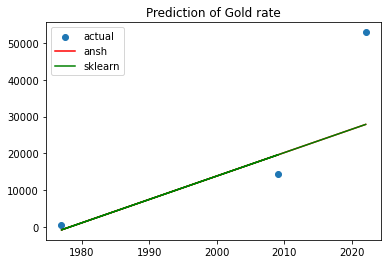

In [48]:
fig, ax = plt.subplots()
ax.scatter(xtest,ytest, label = "actual")
ax.plot(xtest, prediction, color = 'red', label = "ansh")
ax.plot(xtest, testing, color = 'green', label = "sklearn")
ax.set_title("Prediction of Gold rate")
ax.legend()
plt.show()